<a href="https://colab.research.google.com/github/Balraj-o6/SMS-Spam-classifier/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only necessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Check distribution
print(df['label'].value_counts())

# Preview the data
print(df.head())


label
ham     4825
spam     747
Name: count, dtype: int64
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Visualise the dataset into spam or ham

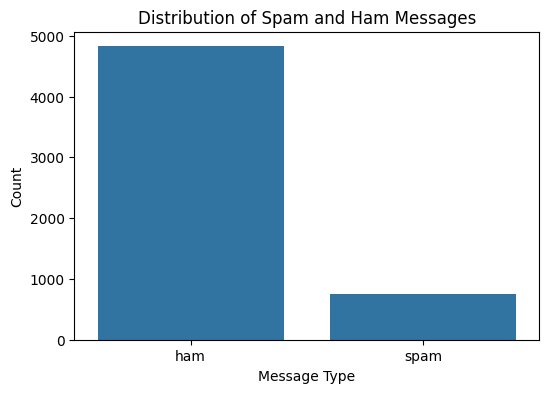

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of 'spam' and 'ham'
label_counts = df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Preprocess the data
### convert to lowercase
### remove punctuation
### remove stopwords
### tokenization

In [ ]:

import string
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize # Removed NLTK tokenizer
import nltk

nltk.download('stopwords') # Only need stopwords now

def preprocess(text):
    text = text.lower()  # lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # remove punctuation
    # tokens = word_tokenize(text)  # Removed NLTK tokenization
    tokens = text.split() # Simple tokenization by splitting on spaces
    filtered = [word for word in tokens if word not in stopwords.words('english')]  # remove stopwords
    return ' '.join(filtered)

df['cleaned_message'] = df['message'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Convert text to numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])


# Encode label

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['label'])  # 'ham' -> 0, 'spam' -> 1


# Split the dataset into train & test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model on train set & predict the sms on test set

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9426008968609866
Confusion Matrix:
 [[961   4]
 [ 60  90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.96      0.60      0.74       150

    accuracy                           0.94      1115
   macro avg       0.95      0.80      0.85      1115
weighted avg       0.94      0.94      0.94      1115



# Test the trained model on new data

In [ ]:
def predict_message(msg):
    msg = preprocess(msg)
    vector = vectorizer.transform([msg])
    prediction = model.predict(vector)[0]
    return 'Spam' if prediction == 1 else 'Ham'

# Example
print(predict_message("Congratulations! You've won a free ticket."))
print(predict_message("Hey, how are you doing today?"))


Ham
Ham
